In [ ]:
import tensorflow as tf

In [ ]:
(xtrain, ytrain) , (xtest, ytest) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


5

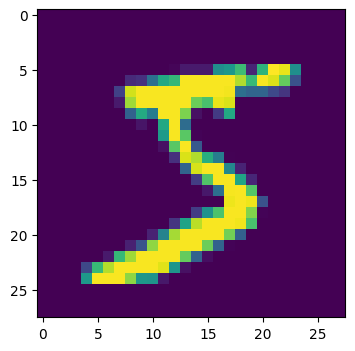

In [ ]:
import matplotlib.pyplot as plt
figure= plt.figure(figsize = (4,4))
plt.imshow(xtrain[0])
ytrain[0]

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
xtrain = xtrain.reshape(60000, -1 )/255.0
xtest = xtest.reshape(10000, -1 )/255.0
xtrain.shape

(60000, 784)

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain)
print(ytrain.shape)

ytest = tf.keras.utils.to_categorical(ytest)
ytest.shape


(60000, 10)


(10000, 10)

In [ ]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Concatenate

model = Sequential()
model.add(Dense(256, activation = 'relu' , input_shape = (784,)))
model.add(Dense(256, activation = 'relu' ))
model.add(Dense(10, activation = 'softmax'))


In [ ]:
model.compile(optimizer='adam' , loss= 'categorical_crossentropy' , metrics = ['accuracy'] )
print(xtrain.shape)
print(ytrain.shape)

(60000, 784)
(60000, 10)


In [ ]:
model.fit(xtrain, ytrain, epochs= 15, batch_size= 6000)

Epoch 1/15
10/10 [==============================] - 2s 134ms/step - loss: 1.5403 - accuracy: 0.6318
Epoch 2/15
10/10 [==============================] - 1s 132ms/step - loss: 0.5420 - accuracy: 0.8518
Epoch 3/15
10/10 [==============================] - 1s 135ms/step - loss: 0.3527 - accuracy: 0.8961
Epoch 4/15
10/10 [==============================] - 1s 132ms/step - loss: 0.2856 - accuracy: 0.9167
Epoch 5/15
10/10 [==============================] - 1s 132ms/step - loss: 0.2446 - accuracy: 0.9291
Epoch 6/15
10/10 [==============================] - 1s 133ms/step - loss: 0.2166 - accuracy: 0.9381
Epoch 7/15
10/10 [==============================] - 1s 135ms/step - loss: 0.1924 - accuracy: 0.9453
Epoch 8/15
10/10 [==============================] - 2s 225ms/step - loss: 0.1744 - accuracy: 0.9502
Epoch 9/15
10/10 [==============================] - 1s 131ms/step - loss: 0.1576 - accuracy: 0.9548
Epoch 10/15
10/10 [==============================] - 1s 133ms/step - loss: 0.1443 - accuracy: 0.9592

In [ ]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1095 - accuracy: 0.9666


[0.10948946326971054, 0.9666000008583069]

## Now building a Functional API

In [ ]:
model2 = Model()
input = Input(shape= (784,) )

In [ ]:
h1 = Dense(256 , activation= 'relu')(input)            # h1 is output of layes, input is the 'input' of layer

In [ ]:
h2 = Dense(256, activation = 'relu')(h1)
h_up = Dense(256, activation = 'relu')(input)
concact = Concatenate()([h_up, h2])
output = Dense(10, activation = 'softmax')(concact)


In [ ]:
model2 = Model(inputs = [input] , outputs = [output])
model2.compile(optimizer = 'adam' , loss= 'categorical_crossentropy', metrics= 'accuracy')

model2.fit( xtrain, ytrain, batch_size= 10000, epochs= 3)

Epoch 1/3
6/6 [==============================] - 4s 422ms/step - loss: 0.0391 - accuracy: 0.9886
Epoch 2/3
6/6 [==============================] - 2s 375ms/step - loss: 0.0331 - accuracy: 0.9907
Epoch 3/3
6/6 [==============================] - 2s 365ms/step - loss: 0.0290 - accuracy: 0.9922


In [ ]:
model2.evaluate(xtest, ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9827


[0.05750222131609917, 0.982699990272522]